In [ ]:
#!/usr/bin/env python
# coding: utf-8

### Importing important Libraries<br>


In[162]:

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

### Reading our dataset

In[2]:

In [3]:
data=pd.read_csv(r'HR_comma_sep.csv')

#### Dimension of our dataset

In[3]:

In [4]:
data.shape

(14999, 10)

In[4]:

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In[5]:

In [8]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

### Describing the dataset

In[6]:

In [9]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In[7]:

In [10]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In[8]:

In [11]:
data.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

### Checking for Null Values

In[9]:

In [12]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

There are no missing values in the data

# Analyze the Data

### Univariate  Analysis

In[10]:

#Variable identification 

In [33]:
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project           category
average_montly_hours        int64
time_spend_company       category
Work_accident            category
left                     category
promotion_last_5years    category
sales                      object
salary                   category
dept                     category
dtype: object

In[11]:

#converting object type to category datatype

In [4]:
data['dept']=data['sales']
data['dept']=data['dept'].astype('category')
data['salary']=data['salary'].astype('category')
data['promotion_last_5years']=data['promotion_last_5years'].astype('category')
data['left']=data['left'].astype('category')
data['Work_accident']=data['Work_accident'].astype('category')
data['time_spend_company']=data['time_spend_company'].astype('category')
data['number_project']=data['number_project'].astype('category')

In[12]:

converted data types

In [5]:
data.drop('sales',inplace=True,axis=1)


In [36]:
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project           category
average_montly_hours        int64
time_spend_company       category
Work_accident            category
left                     category
promotion_last_5years    category
salary                   category
dept                     category
dtype: object

## plots for univariate analysis (continuous)<br>


In[186]:

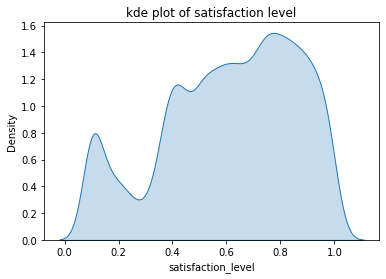

In [17]:
sns.kdeplot(data['satisfaction_level'],shade=True)
plt.title("kde plot of satisfaction level")
plt.show()

In[187]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


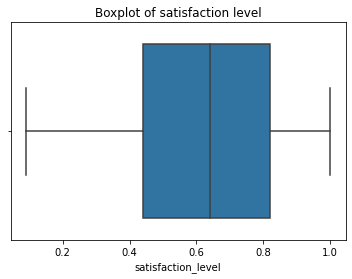

In [18]:
sns.boxplot(data['satisfaction_level'])
plt.title("Boxplot of satisfaction level")
plt.show()

#### There are no outliers in the satisfaction level data. 

In[189]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


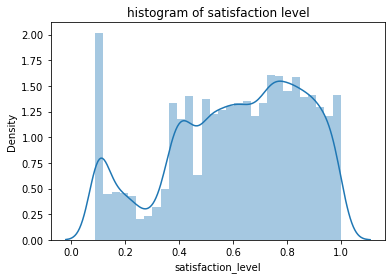

In [19]:
sns.distplot(data['satisfaction_level'])
plt.title("histogram of satisfaction level")
plt.show()

In[191]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


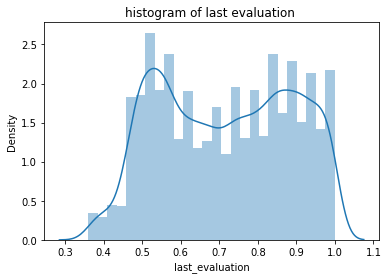

In [20]:
sns.distplot(data['last_evaluation'])
plt.title('histogram of last evaluation ')
plt.show()

In[202]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


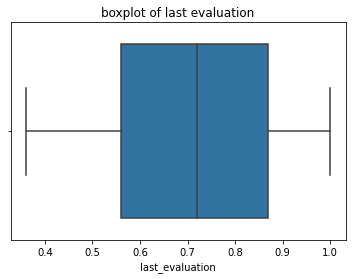

In [21]:
sns.boxplot(data['last_evaluation'])
plt.title('boxplot of last evaluation')
plt.show()

####  There are no outliers in this last evaluation index data 

In[193]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


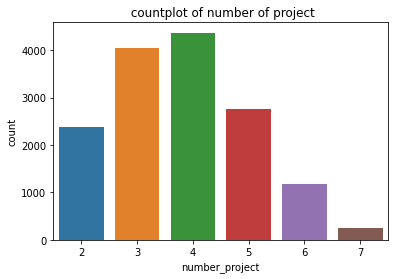

In [22]:
sns.countplot(data['number_project'])
plt.title(' countplot of number of project')
plt.show()

####  The number of people with number of projects=4 forms the majority in the company 

In[195]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


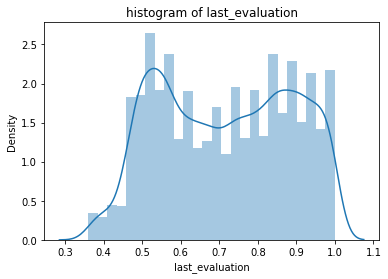

In [23]:
sns.distplot(data['last_evaluation'])
plt.title('histogram of last_evaluation')
plt.show()

In[197]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


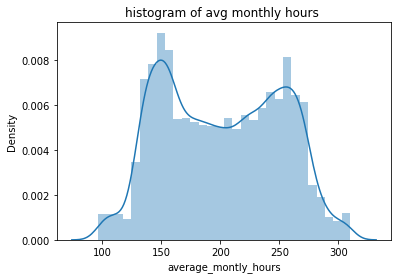

In [24]:
sns.distplot(data['average_montly_hours'])
plt.title('histogram of avg monthly hours ')
plt.show()

In[206]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


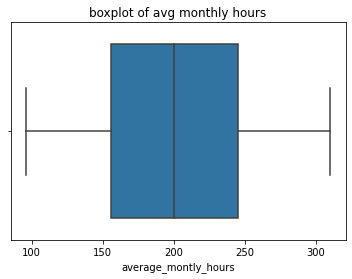

In [25]:
sns.boxplot(data['average_montly_hours'])
plt.title('boxplot of avg monthly hours')
plt.show()

####  there are no outliers in the average monthly hours data

In[19]:

In [37]:
data['dept'].unique()

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD']
Categories (10, object): ['IT', 'RandD', 'accounting', 'hr', ..., 'product_mng', 'sales', 'support', 'technical']

In[20]:

In [26]:
data['salary'].unique()

['low', 'medium', 'high']
Categories (3, object): ['high', 'low', 'medium']

## Univariate analysis(categorical)

In[207]:

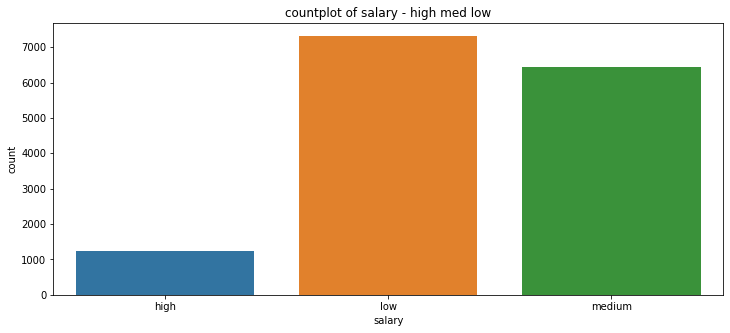

In [40]:
fig= plt.figure(figsize=(12,5))
sns.countplot(data['salary'])
plt.title('countplot of salary - high med low')
plt.show()

#### the number of employees getting the low salary bracket is maximum in the company followed by medium then high.  

In[208]:

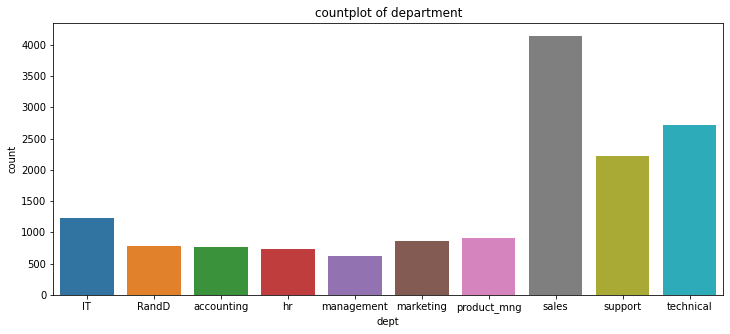

In [41]:
fig= plt.figure(figsize=(12,5))
sns.countplot(data['dept'])
plt.title('countplot of department')
plt.show()

####  the number of people employed in the sales department is the highest 

In[211]:

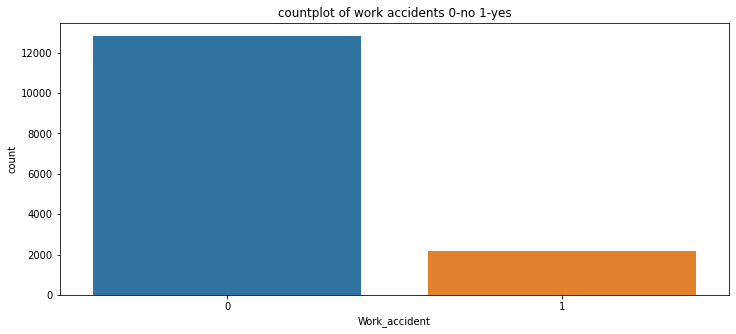

In [42]:
fig= plt.figure(figsize=(12,5))
sns.countplot(data['Work_accident'])
plt.title('countplot of work accidents 0-no 1-yes')
plt.show()

#### The number of employees who didnot commit a work accident are of a higher frequency compared to the number who did commit a work accident 

In[212]:

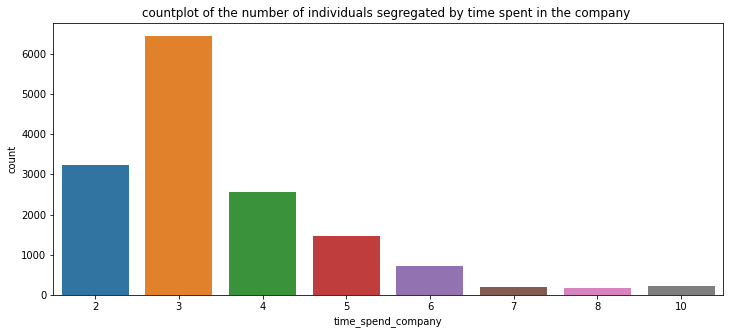

In [43]:
fig= plt.figure(figsize=(12,5))
sns.countplot(data['time_spend_company'])
plt.title('countplot of the number of individuals segregated by time spent in the company ')
plt.show()

#### number of people who have spent 3 years in the company form the majority 

In[214]:

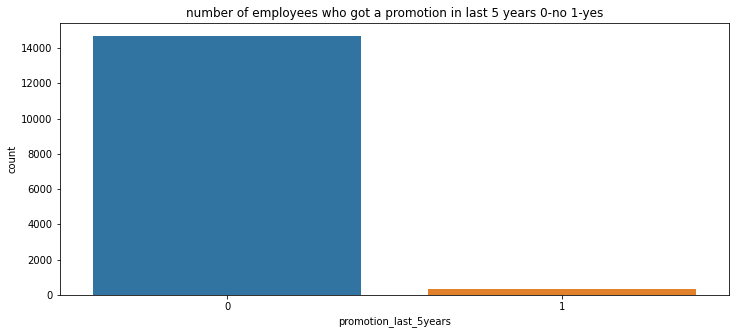

In [44]:
fig= plt.figure(figsize=(12,5))
sns.countplot(data['promotion_last_5years'])
plt.title('number of employees who got a promotion in last 5 years 0-no 1-yes')
plt.show()

#### Majority of Employees in the company were not given a promotion in last 5 years

In[39]:

In [46]:
data.groupby('dept').mean()

,satisfaction_level,last_evaluation,average_montly_hours
dept,,,
IT,0.618142,0.716830,202.215974
RandD,0.619822,0.712122,200.800508
accounting,0.582151,0.717718,201.162973
hr,0.598809,0.708850,198.684709
management,0.621349,0.724000,201.249206
marketing,0.618601,0.715886,199.385781
product_mng,0.619634,0.714756,199.965632
sales,0.614447,0.709717,200.911353
support,0.618300,0.723109,200.758188


We see on an average satisfaction level,last evaluation of Management dept is highest And average monthly hours of HR is lowest. 

In[42]:

In [47]:
data.groupby('time_spend_company').mean()

,satisfaction_level,last_evaluation,average_montly_hours
time_spend_company,,,
2,0.697078,0.717596,200.133169
3,0.626314,0.668721,186.632935
4,0.467517,0.767927,223.455221
5,0.610305,0.813666,222.978955
6,0.603440,0.754875,212.051532
7,0.635957,0.682766,200.744681
8,0.665062,0.711975,193.802469
10,0.655327,0.731495,199.224299


satisfaction level of employees working for 4 years is highest. But the last evaluation is highest for employees who have spent 5 years in the company . The employees working for 3 years in the company have lowest mean monthly hours of work 

In[43]:

In [ ]:
data.columns

In[44]:

In [48]:
data.groupby('Work_accident').mean()

,satisfaction_level,last_evaluation,average_montly_hours
Work_accident,,,
0,0.606833,0.716602,201.258613
1,0.648326,0.713144,199.818349


In[45]:

In [49]:
data.groupby('salary').mean()

,satisfaction_level,last_evaluation,average_montly_hours
salary,,,
high,0.637470,0.704325,199.867421
low,0.600753,0.717017,200.996583
medium,0.621817,0.717322,201.338349


People belonging to the higher salary bracket have a greater satisfaction level , Higher salary workers work less on an average 

In[47]:

In [ ]:
data.groupby('Work_accident').mean()

In[50]:

In [ ]:
data.groupby('number_project').mean()

## Bivariate analysis 

In[26]:

In [6]:
numerical=data.select_dtypes(include=(['int64','float64']))[:]
# select numerical columns of integer and float data type 

In[27]:

In [51]:
numerical

,satisfaction_level,last_evaluation,average_montly_hours
0,0.38,0.53,157
1,0.80,0.86,262
2,0.11,0.88,272
3,0.72,0.87,223
4,0.37,0.52,159
...,...,...,...
14994,0.40,0.57,151
14995,0.37,0.48,160
14996,0.37,0.53,143
14997,0.11,0.96,280


In[41]:

In [52]:
numerical.corr()

,satisfaction_level,last_evaluation,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.020048
last_evaluation,0.105021,1.000000,0.339742
average_montly_hours,-0.020048,0.339742,1.000000


satisfaction level and avg monthly hours are negatively correlated as workers work more their sat level decreases<br>
last evaluation points are more if you work more <br>
if your evaluation points are more then satisfaction level is more. <br>


In[29]:

<AxesSubplot:>

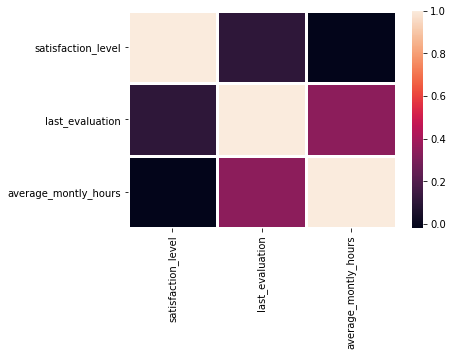

In [53]:
correlation=numerical.corr()
sns.heatmap(correlation,linewidth=3)

In[30]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

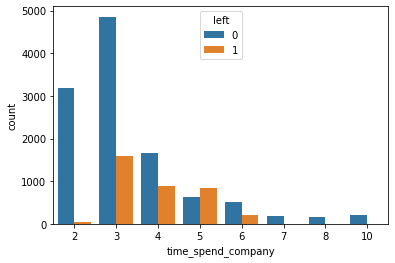

In [54]:
sns.countplot('time_spend_company',hue='left',data=data)

In[31]:

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

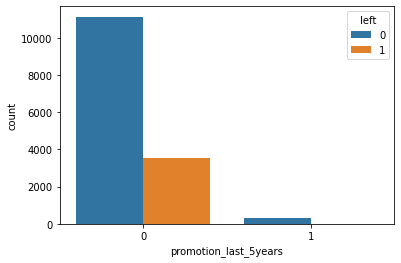

In [55]:
sns.countplot('promotion_last_5years',hue='left',data=data)

In[32]:

In [ ]:
sns.countplot('Work_accident',hue='left',data=data)

In[33]:

<AxesSubplot:xlabel='dept', ylabel='count'>

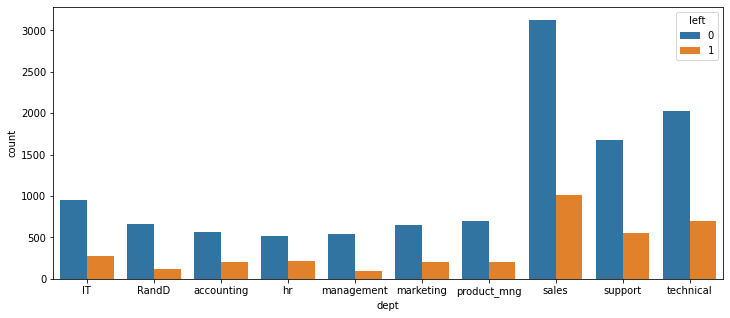

In [57]:
figu=plt.figure(figsize=(12,5))
sns.countplot('dept',hue='left',data=data)

In[34]:

(0.0, 1.1)

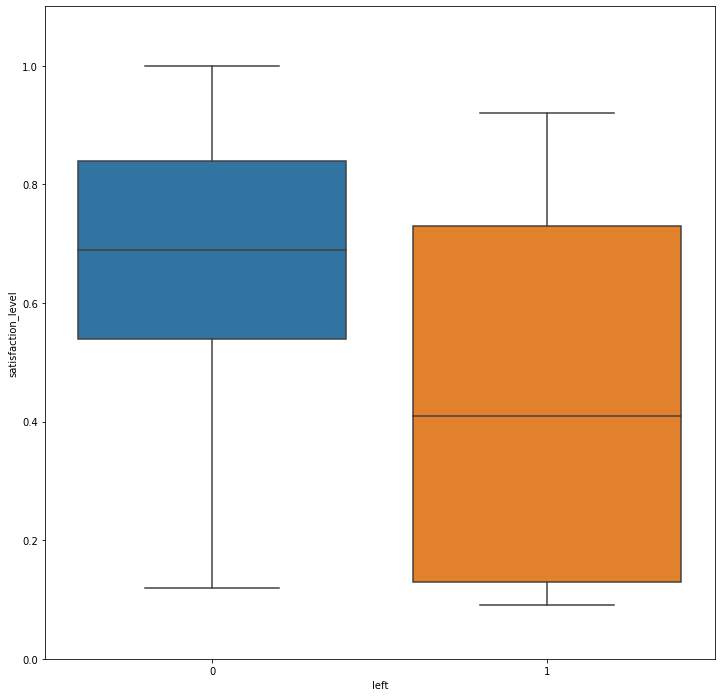

In [58]:
fig=plt.figure(figsize=(12,12))
sns.boxplot(x='left',y='satisfaction_level',data=data)
plt.ylim(0,1.1)

In[35]:

In [ ]:
sns.boxplot(x='left',y='last_evaluation',data=data)

In[36]:

In [ ]:
sns.boxplot('left','average_montly_hours',data=data)

In[51]:

In [7]:
from sklearn.preprocessing import StandardScaler

In[52]:

In [8]:
ss= StandardScaler()

In[54]:

In [9]:
sdata= ss.fit_transform(numerical)

In[55]:

In [62]:
sdata

array([[-0.93649469, -1.08727529, -0.88203988],
       [ 0.75281433,  0.84070693,  1.22042276],
       [-2.02247906,  0.95755433,  1.4206573 ],
       ...,
       [-0.97671633, -1.08727529, -1.16236823],
       [-2.02247906,  1.42494396,  1.58084493],
       [-0.97671633, -1.14569899, -0.86201642]])

In[56]:

In [63]:
numerical.head()

,satisfaction_level,last_evaluation,average_montly_hours
0,0.38,0.53,157
1,0.80,0.86,262
2,0.11,0.88,272
3,0.72,0.87,223
4,0.37,0.52,159


In[64]:

In [10]:
snumerical = pd.DataFrame(sdata, columns=["scaled_sat_level", 'scaled_last_eval', 'scaled_avg_monthly_hours'])

In[66]:

In [65]:
snumerical.head()

,scaled_sat_level,scaled_last_eval,scaled_avg_monthly_hours
0,-0.936495,-1.087275,-0.882040
1,0.752814,0.840707,1.220423
2,-2.022479,0.957554,1.420657
3,0.431041,0.899131,0.439508
4,-0.976716,-1.145699,-0.841993


In[72]:

In [11]:
scaled_data=pd.concat([data,snumerical],axis=1)

In[73]:

In [12]:
scaled_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept,scaled_sat_level,scaled_last_eval,scaled_avg_monthly_hours
0,0.38,0.53,2,157,3,0,1,0,low,sales,-0.936495,-1.087275,-0.882040
1,0.80,0.86,5,262,6,0,1,0,medium,sales,0.752814,0.840707,1.220423
2,0.11,0.88,7,272,4,0,1,0,medium,sales,-2.022479,0.957554,1.420657
3,0.72,0.87,5,223,5,0,1,0,low,sales,0.431041,0.899131,0.439508
4,0.37,0.52,2,159,3,0,1,0,low,sales,-0.976716,-1.145699,-0.841993


In[74]:

In [13]:
scaled_data.isna().sum()

satisfaction_level          0
last_evaluation             0
number_project              0
average_montly_hours        0
time_spend_company          0
Work_accident               0
left                        0
promotion_last_5years       0
salary                      0
dept                        0
scaled_sat_level            0
scaled_last_eval            0
scaled_avg_monthly_hours    0
dtype: int64

In[77]:

In [ ]:
sns.boxplot(scaled_data['scaled_last_eval'])

In[78]:

In [ ]:
sns.boxplot(scaled_data['scaled_sat_level'])

In[79]:

In [ ]:
sns.boxplot(scaled_data['scaled_avg_monthly_hours'])

In[85]:

In [14]:
scaled_data['left']=scaled_data['left'].astype('int64')

In[91]:

In [29]:
scaled_data.dtypes

satisfaction_level           float64
last_evaluation              float64
number_project                 int64
average_montly_hours           int64
time_spend_company             int64
Work_accident                  int64
left                           int64
promotion_last_5years          int64
salary                      category
scaled_sat_level             float64
scaled_last_eval             float64
scaled_avg_monthly_hours     float64
dtype: object

In[86]:

In [15]:
scaled_data['promotion_last_5years']=scaled_data['promotion_last_5years'].astype('int64')

In[87]:

In [16]:
scaled_data['Work_accident']=scaled_data['Work_accident'].astype('int64')

In[88]:

In [17]:
scaled_data['time_spend_company']=scaled_data['time_spend_company'].astype('int64')

In[93]:

In [18]:
scaled_data['number_project']=scaled_data['number_project'].astype('int64')

In[98]:

In [19]:
scaled_data.drop(columns="dept",inplace=True)

In[102]:

In [20]:
fdata=pd.get_dummies(scaled_data)

In[103]:

In [21]:
fdata.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'scaled_sat_level', 'scaled_last_eval',
       'scaled_avg_monthly_hours', 'salary_high', 'salary_low',
       'salary_medium'],
      dtype='object')

In[138]:

In [22]:
x=fdata[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary_low',
       'salary_medium']]

In[139]:

In [23]:
y=fdata[['left']]

In [24]:
x1=sm.add_constant(x)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In[109]:

In[140]:

In [25]:
x_train, x_test, y_train, y_test =train_test_split(x1,y,test_size=0.33,random_state=4)
#used for initializing the internal random no. generator for split 

In[113]:

In[141]:

In [26]:
logre=LogisticRegression()
model=logre.fit(x_train,y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In[142]:

In [37]:
model.classes_

array([0, 1], dtype=int64)

In[143]:

In [38]:
model.intercept_

array([-0.45196687])

In[144]:

In [84]:
model.coef_

array([[-4.14456604e+00,  8.12885658e-01, -3.06630980e-01,
         4.03171498e-03,  2.47919025e-01, -1.47578262e+00,
        -1.24128060e+00,  1.80745369e+00,  1.28765027e+00]])

In[145]:

In [27]:
y_pred=logre.predict(x_test)

In[147]:

In [28]:
logre.score(x_test,y_test)

0.7878787878787878

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      4247
           1       0.35      0.60      0.45       703

    accuracy                           0.79      4950
   macro avg       0.64      0.71      0.66      4950
weighted avg       0.84      0.79      0.81      4950



In[148]:

In [91]:
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.428350
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.217    
Dependent Variable:   left               AIC:                8628.9875
Date:                 2021-08-07 18:06   BIC:                8701.1397
No. Observations:     10049              Log-Likelihood:     -4304.5  
Df Model:             9                  LL-Null:            -5498.6  
Df Residuals:         10039              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.4702   0.2074  -7.0903 0.0000 -1.8766 -1.0638
sat

In[149]:

In [40]:

logre.score(x_train,y_train)

0.7936113046074236

In[150]:

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3757
           1       0.60      0.35      0.45      1193

    accuracy                           0.79      4950
   macro avg       0.71      0.64      0.66      4950
weighted avg       0.77      0.79      0.77      4950



In[151]:

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3477  280]
 [ 770  423]]


In[156]:

Text(33.0, 0.5, 'actual')

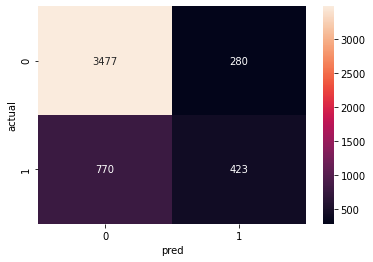

In [43]:
sns.heatmap(confusion_matrix,annot=True,fmt='g')#annot=true to write the numbers in the cells and fmt='g' to remove the sc notaations 
plt.xlabel('pred')
plt.ylabel('actual')

## Oversampling ( since the data is imbalanced)

In[166]:

In [44]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

In[169]:

In [45]:
os_data_x,os_data_y=os.fit_resample(x_train, y_train)

In[172]:

In [99]:
import statsmodels.api as sm
logit_model1=sm.Logit(os_data_y,os_data_x)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.428350
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.217    
Dependent Variable:   left               AIC:                8628.9875
Date:                 2021-08-07 18:13   BIC:                8701.1397
No. Observations:     10049              Log-Likelihood:     -4304.5  
Df Model:             9                  LL-Null:            -5498.6  
Df Residuals:         10039              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       7.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.4702   0.2074  -7.0903 0.0000 -1.8766 -1.0638
sat

As satisfaction level, number of projects, work accidents promotoion in last 5 years increases the probability of employees leaving is less compared to the probability of employees not leaving( since the coeff are negative). We can also find the probability of leaving(p) by equating log (p/1-p) = estimated coefficient. 

Similarly, the probability of people leaving when salary is low medium or more monthly hours spent is more than probability of not leaving. 

In[175]:

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='left', ylabel='count'>

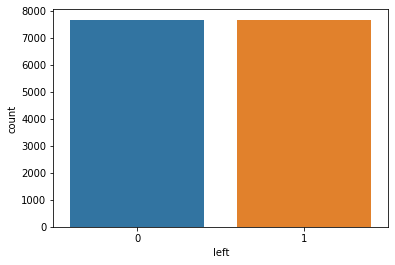

In [100]:
sns.countplot(os_data_y['left'])

In[177]:

In [46]:
logreg=LogisticRegression()
model1=logreg.fit(os_data_x,os_data_y)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In[178]:

In [47]:
y_ospred=logreg.predict(x_test)

In[180]:

In [48]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_test, y_ospred)
print(confusionmatrix)

[[2781  976]
 [ 215  978]]


In[181]:

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_ospred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      3757
           1       0.50      0.82      0.62      1193

    accuracy                           0.76      4950
   macro avg       0.71      0.78      0.72      4950
weighted avg       0.83      0.76      0.77      4950



In[182]:

Text(33.0, 0.5, 'actual')

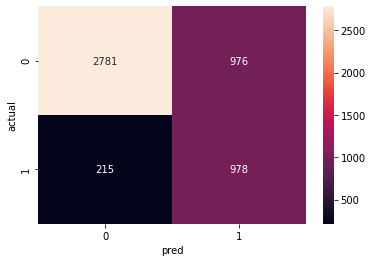

In [107]:
sns.heatmap(confusionmatrix,annot=True,fmt='g')#annot=true to write the numbers in the cells and fmt='g' to remove the sc notaations 
plt.xlabel('pred')
plt.ylabel('actual')

In [34]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.inspection import permutation_importance

In [36]:
rf=RandomForestClassifier(n_estimators=100,random_state=0)
#n_estimators--> no. of trees used in the random forest ( ensemble of decision trees), here the quality of split is done by comparing gini 
#randomness of the bootstrapping of the samples and sampling of the features considered when looking for split in each node. 


In [37]:
rf.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_61484/1149647727.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(random_state=0)

In [38]:
predd=rf.predict(x_test)
# predicts the value of y belongs to {0,1} in the test set 

In [40]:
predicted_prob

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [39]:
predicted_prob= rf.predict_proba(x_test)

In [67]:
feature_scores= pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
# gives each feature a feature score denoting its importance 

In [68]:
feature_scores

satisfaction_level       0.403001
time_spend_company       0.177069
number_project           0.153870
average_montly_hours     0.138977
last_evaluation          0.117300
salary_low               0.003771
salary_medium            0.002750
Work_accident            0.002741
promotion_last_5years    0.000522
const                    0.000000
dtype: float64

<AxesSubplot:>

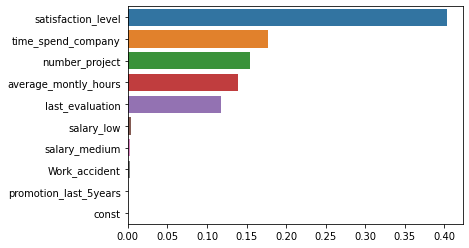

In [69]:
sns.barplot(x=feature_scores,y=feature_scores.index)

The major reason of employee attrition is because of satisfaction level, time spend in the company. 

In [70]:

rf.feature_importances_

array([0.        , 0.40300128, 0.11729981, 0.15386981, 0.13897652,
       0.17706907, 0.00274114, 0.00052151, 0.00377074, 0.00275012])

In [71]:
confusion_matrix(y_test,predd)


array([[3752,    5],
       [  46, 1147]], dtype=int64)

In [72]:
print(classification_report(y_test,predd))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3757
           1       1.00      0.96      0.98      1193

    accuracy                           0.99      4950
   macro avg       0.99      0.98      0.99      4950
weighted avg       0.99      0.99      0.99      4950



In [ ]:
pred_train


We see for prediction rf gives much better results than logit but rf being a blackbox model is hardly interpretable For interpretation purpose we should resort to logit, which gives us an idea as to which predictor or variable leads to an increase or decrease in the probability of the employee leaving. 

Here we have also used over sampling technique to remove the imbalance in the data, we can also use SMOTE technique to make the data balanced. 